In [1]:
import numpy as np

In [2]:
class OwnPCA:
    def __init__(self, ip, n = None):
        self.ip = ip
        if n is not None:
            self.n = n
        else:
            self.n = ip.shape[1]

    def pca(self):
        #normalize matrix
        self.normalize_ip = self.ip - self.ip.mean(axis=0) 
        #Step 1 - Find co-variance of the matrix
        self.covariance = np.cov(self.ip.T)
        #Step - 2 - Find eigenvalues and eigenvectors
        self.eigenvalues, self.eigenvectors = np.linalg.eig(self.covariance)
        #eigenvalues in descending order
        idx = self.eigenvalues.argsort()[::-1]   
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[:,idx]
        #Step - 3 - Take the first n principle components stated by user
        self.eigenvectors = self.eigenvectors[:,:self.n]
        #Step - 4 - Find scores by multiplying it with data
        scores = np.dot(self.normalize_ip, self.eigenvectors)
        return scores
    
    def getCovariance(self):
        return self.covariance
    
    def getEigenvalues(self):
        return self.eigenvalues
    
    def getEigenvectors(self):
        return self.eigenvectors
    
    def getAllValues(self):
        return self.covariance, self.eigenvalues, self.eigenvectors

In [9]:
data = np.mat("2.5 2.4; 0.5 0.7; 2.2 2.9; 1.9 2.2; 3.1 3.0; 2.3 2.7; 2.0 1.6; 1.0 1.1; 1.5 1.6; 1.1 0.9")

In [10]:
data

matrix([[ 2.5,  2.4],
        [ 0.5,  0.7],
        [ 2.2,  2.9],
        [ 1.9,  2.2],
        [ 3.1,  3. ],
        [ 2.3,  2.7],
        [ 2. ,  1.6],
        [ 1. ,  1.1],
        [ 1.5,  1.6],
        [ 1.1,  0.9]])

In [11]:
own_pca = OwnPCA(data)
answer = own_pca.pca()
answer

matrix([[-0.82797019, -0.17511531],
        [ 1.77758033,  0.14285723],
        [-0.99219749,  0.38437499],
        [-0.27421042,  0.13041721],
        [-1.67580142, -0.20949846],
        [-0.9129491 ,  0.17528244],
        [ 0.09910944, -0.3498247 ],
        [ 1.14457216,  0.04641726],
        [ 0.43804614,  0.01776463],
        [ 1.22382056, -0.16267529]])

In [12]:
data.shape[1]

2

In [46]:
import pandas as pd

In [47]:
test_data = pd.read_csv(r"C:\Users\Mithun\PycharmProjects\mlclassroom\sclc_study_output.csv")

In [90]:
test_data.values

array([[  171210.5829 ,  1246686.524  ,   527193.487  , ...,
          259889.4715 ,  1563879.456  ,   189971.5111 ],
       [  204751.3591 ,  1338013.461  ,   571379.0841 , ...,
          363398.5823 ,   304311.3998 ,    35762.79339],
       [  203558.4952 ,  1040438.105  ,   498460.6875 , ...,
          417606.081  ,   436556.8065 ,    53865.65208],
       ..., 
       [  204221.0677 ,  1278411.147  ,   566328.7108 , ...,
          148904.9146 ,   708831.1396 ,   121367.7799 ],
       [  175149.2572 ,  1101994.558  ,   175843.386  , ...,
          144382.0813 ,    77809.90877,   287232.319  ],
       [  225370.32   ,  1407596.388  ,        0.     , ...,
          115385.9564 ,    61827.40414,   176777.0753 ]])

In [49]:
test_data.drop(test_data.columns[0], axis=1, inplace=True)
# #Removed non-numeric items
tdata = test_data.values
tdata

array([[  171210.5829 ,  1246686.524  ,   527193.487  , ...,
          259889.4715 ,  1563879.456  ,   189971.5111 ],
       [  204751.3591 ,  1338013.461  ,   571379.0841 , ...,
          363398.5823 ,   304311.3998 ,    35762.79339],
       [  203558.4952 ,  1040438.105  ,   498460.6875 , ...,
          417606.081  ,   436556.8065 ,    53865.65208],
       ..., 
       [  204221.0677 ,  1278411.147  ,   566328.7108 , ...,
          148904.9146 ,   708831.1396 ,   121367.7799 ],
       [  175149.2572 ,  1101994.558  ,   175843.386  , ...,
          144382.0813 ,    77809.90877,   287232.319  ],
       [  225370.32   ,  1407596.388  ,        0.     , ...,
          115385.9564 ,    61827.40414,   176777.0753 ]])

In [53]:
own_pca_testdata = OwnPCA(tdata)

In [54]:
own_scores = own_pca_testdata.pca()

In [55]:
own_scores
#first done using normalized, non normalized is done below. All answers are therefore 
#for standardized as it is usual method of PCA

array([[  1.69371410e+06 +0.00000000e+00j,
         -6.38909145e+05 +0.00000000e+00j,
         -1.12019839e+05 +0.00000000e+00j, ...,
         -7.64511692e-10 +2.88512940e-09j,
          8.73465983e-10 -2.35433306e-09j,
          8.86426283e-10 +2.35342356e-09j],
       [  1.57278283e+06 +0.00000000e+00j,
         -2.06667774e+05 +0.00000000e+00j,
          1.41375294e+06 +0.00000000e+00j, ...,
          1.81990367e-09 +4.21865759e-10j,
          1.52056742e-09 +7.39552183e-10j,
          1.49629528e-09 -7.40234304e-10j],
       [  1.71909362e+06 +0.00000000e+00j,
         -2.52991048e+05 +0.00000000e+00j,
          1.40130898e+06 +0.00000000e+00j, ...,
         -1.17082677e-09 -1.23534207e-09j,
         -1.58869161e-09 -7.84832634e-11j,
         -1.60725098e-09 +7.05251848e-11j],
       ..., 
       [ -6.83987938e+05 +0.00000000e+00j,
         -1.19272386e+06 +0.00000000e+00j,
         -8.00012032e+05 +0.00000000e+00j, ...,
         -9.11015449e-10 -5.10705897e-10j,
         -8.834721

In [17]:
#pca_sklearn = decomposition.PCA(2)

In [18]:
#pca_sklearn.fit(tdata)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
#X = pca_sklearn.transform(tdata)

In [20]:
#X
#Just for verification - not needed

array([[ -1.75681915e+00,  -2.20257289e-03],
       [ -8.88177567e-01,  -1.64657996e-02],
       [  5.26487022e-02,   4.46783426e-01],
       ..., 
       [  3.60428154e-01,  -3.45422947e-01],
       [ -2.86808081e+00,   3.85070743e-01],
       [  1.52319700e+00,   1.45746184e-01]])

In [56]:
import matplotlib.pyplot as plt

In [57]:
%matplotlib inline

C:\ProgramData\Miniconda3\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning:

Casting complex values to real discards the imaginary part



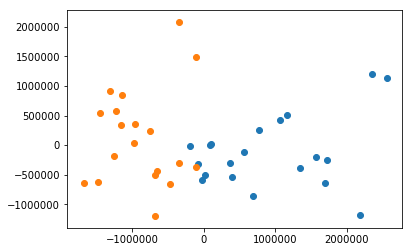

In [125]:
plt.scatter(own_scores[:20,0], own_scores[:20,1], cmap="rainbow")
plt.scatter(own_scores[21:40,0], own_scores[21:40,1])
plt.show()
#Score plots in different colors.

In [59]:
own_pca_testdata.getEigenvectors()

array([[ 0.00793051+0.j        , -0.02839977+0.j        ,
        -0.00128957+0.j        , ..., -0.02069904-0.07879285j,
        -0.06987386+0.02464488j, -0.06987386-0.02464488j],
       [-0.02323800+0.j        , -0.03991614+0.j        ,
         0.01754063+0.j        , ..., -0.00148154+0.0029995j ,
         0.00626392-0.00615178j,  0.00626392+0.00615178j],
       [ 0.00432458+0.j        ,  0.04716502+0.j        ,
        -0.00301494+0.j        , ...,  0.00742841-0.00787899j,
         0.00104540+0.00358406j,  0.00104540-0.00358406j],
       ..., 
       [ 0.05130296+0.j        , -0.05759638+0.j        ,
         0.05277330+0.j        , ...,  0.00616126-0.00423349j,
         0.02973602-0.01947976j,  0.02973602+0.01947976j],
       [ 0.32860836+0.j        , -0.12253561+0.j        ,
        -0.22866486+0.j        , ...,  0.00127319+0.01166726j,
        -0.00512789-0.00878837j, -0.00512789+0.00878837j],
       [-0.01606034+0.j        , -0.04003940+0.j        ,
        -0.01020451+0.j      

In [60]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

#In case want to use plotly for visualization. I will do it using Seaborn.

<script>requirejs.config({paths: { 'plotly': ['https://cdn.plot.ly/plotly-latest.min']},});if(!window.Plotly) {{require(['plotly'],function(plotly) {window.Plotly=plotly;});}}</script>

In [61]:
%matplotlib inline

In [62]:
#

In [30]:
#Uncomment below code to view data in 3D plot

In [63]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(own_scores[:,0],own_scores[:,1], own_scores[:,2])
# ax.plot(own_pca_testdata.getEigenvectors()[0], 
#         own_pca_testdata.getEigenvectors()[1], 
#         own_pca_testdata.getEigenvectors()[2], "r")

In [42]:
own_pca_testdata.getEigenvectors()[0][1]

0.0044870530107291567

In [43]:
own_pca_testdata.getEigenvectors()[1][0]

0.98203350585526439

In [64]:
import seaborn as sns

In [67]:
#We will plot using seaborn library.

array([0, 1, 2])

In [65]:
performance = [i/sum(own_pca_testdata.getEigenvalues())*100 for i in own_pca_testdata.getEigenvalues()]

In [93]:
performance
x_pos = np.arange(len(performance))

C:\ProgramData\Miniconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning:

Casting complex values to real discards the imaginary part

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\patches.py:693: ComplexWarning:

Casting complex values to real discards the imaginary part



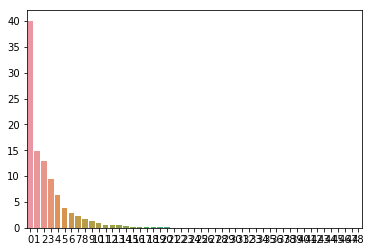

In [69]:
#Here we can see we need first 4 PCA to cover 75% data
sns.barplot(x_pos, performance)

In [72]:
mean_matrix = np.mean(np.mat(tdata),0)
variance_input = np.mean(np.square(np.subtract(tdata,mean_matrix)),0)
variance_input

matrix([[  2.47165734e+09,   2.00766213e+10,   2.13035355e+10,
           9.37311752e+09,   1.17858371e+08,   3.23790516e+08,
           2.69112561e+09,   1.83153938e+09,   4.88534283e+10,
           7.30236687e+08,   5.36680732e+09,   4.94528921e+08,
           3.13201153e+09,   5.82860453e+09,   2.24116657e+11,
           2.18692288e+11,   2.28024889e+10,   1.87368067e+11,
           9.71834433e+09,   2.07379324e+10,   2.25958807e+11,
           1.71871082e+10,   3.59751203e+10,   1.14226717e+10,
           1.71869635e+11,   1.97632405e+10,   9.90552117e+10,
           1.33900309e+10,   1.18941975e+11,   1.75473172e+10,
           3.15830628e+08,   4.08427131e+09,   6.11056441e+09,
           2.74044996e+11,   2.30832382e+09,   4.13485872e+10,
           6.80775761e+09,   1.96176184e+11,   2.92298312e+10,
           9.20293719e+08,   4.90106266e+11,   4.64727733e+10,
           1.46797869e+09,   2.40937214e+09,   3.09271075e+11,
           6.23320459e+10,   1.03583298e+10,   2.497749

In [84]:
from sklearn import decomposition
pca = decomposition.PCA()
X = pca.fit(tdata)
Y = pca.transform(tdata, X)

In [85]:
Y #To verify, answer matches with scikit learn

array([[  1.69371410e+06,  -6.38909145e+05,  -1.12019839e+05, ...,
          1.89622461e+03,  -2.96483187e+03,   3.87877820e-11],
       [  1.57278283e+06,  -2.06667774e+05,   1.41375294e+06, ...,
          1.92241319e+03,  -1.02138904e+03,   1.97929749e-10],
       [  1.71909362e+06,  -2.52991048e+05,   1.40130898e+06, ...,
         -2.22735368e+03,   1.17904047e+03,   5.81373767e-11],
       ..., 
       [ -6.83987938e+05,  -1.19272386e+06,  -8.00012032e+05, ...,
         -1.07421126e+03,  -1.97130386e+02,   4.57487547e-11],
       [ -1.25666200e+06,  -1.87411748e+05,   1.05631457e+05, ...,
          7.51631109e+02,   3.45335883e+03,   1.39161066e-10],
       [ -1.47209710e+06,  -6.26863471e+05,  -8.73295439e+04, ...,
         -4.75834426e+02,  -3.18415208e+03,   1.67330394e-10]])

In [138]:
#variance is diagonal
np.cov(tdata, rowvar=False).diagonal()

array([  2.53503317e+09,   2.05914064e+10,   2.18497800e+10,
         9.61345387e+09,   1.20880381e+08,   3.32092837e+08,
         2.76012883e+09,   1.87850192e+09,   5.01060803e+10,
         7.48960704e+08,   5.50441777e+09,   5.07209150e+08,
         3.21231952e+09,   5.97805593e+09,   2.29863238e+11,
         2.24299783e+11,   2.33871681e+10,   1.92172377e+11,
         9.96753265e+09,   2.12696743e+10,   2.31752622e+11,
         1.76278032e+10,   3.68975593e+10,   1.17155608e+10,
         1.76276548e+11,   2.02699902e+10,   1.01595089e+11,
         1.37333651e+10,   1.21991769e+11,   1.79972484e+10,
         3.23928849e+08,   4.18899622e+09,   6.26724555e+09,
         2.81071791e+11,   2.36751161e+09,   4.24088074e+10,
         6.98231550e+09,   2.01206342e+11,   2.99793141e+10,
         9.43890994e+08,   5.02673093e+11,   4.76643829e+10,
         1.50561917e+09,   2.47115091e+09,   3.17201102e+11,
         6.39303035e+10,   1.06239280e+10,   2.56179389e+11,
         4.01171889e+09]

In [98]:
np.cov(own_pca_testdata.getEigenvectors(), rowvar=False).diagonal()
#The variance of principal component and original data is not same

array([ 0.01859618+0.j,  0.01739323+0.j,  0.01981016+0.j,  0.02048896+0.j,
        0.01957099+0.j,  0.02083327+0.j,  0.02031818+0.j,  0.02006244+0.j,
        0.02067841+0.j,  0.01947815+0.j,  0.02080518+0.j,  0.01996996+0.j,
        0.02082916+0.j,  0.02047573+0.j,  0.02083236+0.j,  0.02032021+0.j,
        0.02054472+0.j,  0.02039606+0.j,  0.01999227+0.j,  0.02082523+0.j,
        0.02083282+0.j,  0.02003001+0.j,  0.02075495+0.j,  0.02064342+0.j,
        0.02082647+0.j,  0.01983035+0.j,  0.02038730+0.j,  0.02075137+0.j,
        0.02047213+0.j,  0.02079845+0.j,  0.02068777+0.j,  0.02065065+0.j,
        0.02033773+0.j,  0.02053938+0.j,  0.02050738+0.j,  0.02080536+0.j,
        0.02054354+0.j,  0.02077953+0.j,  0.02054342+0.j,  0.02079180+0.j,
        0.02079180+0.j,  0.02059459+0.j,  0.02080055+0.j,  0.02079633+0.j,
        0.02079633+0.j,  0.02076198+0.j,  0.02076198+0.j,  0.02059065+0.j,
        0.02059065+0.j])

In [102]:
np.cov(own_pca_testdata.getEigenvectors()[:,:2], rowvar=False)
#Co-variance between two principal components is 0.00277

array([[ 0.01859618+0.j,  0.00277417+0.j],
       [ 0.00277417+0.j,  0.01739323+0.j]])

In [103]:
performance
#As shown in plot above, and now in numeric, we need first 4 principal component for 75% data

[(40.063899943904438+0j),
 (14.90897134057095+0j),
 (12.996709872406525+0j),
 (9.5348712301466989+0j),
 (6.4404292346208107+0j),
 (3.8147042357559919+0j),
 (2.8828684990928015+0j),
 (2.227699929068097+0j),
 (1.6360170455751757+0j),
 (1.2773307107164396+0j),
 (0.95174613997732804+0j),
 (0.63739437145014433+0j),
 (0.5725040317112523+0j),
 (0.49858974704220377+0j),
 (0.38392465956878996+0j),
 (0.24285880979910299+0j),
 (0.1965329456257269+0j),
 (0.16359056301569547+0j),
 (0.147599433149875+0j),
 (0.13251619459364827+0j),
 (0.071448631909356533+0j),
 (0.047784278396209245+0j),
 (0.039347113610501368+0j),
 (0.027788784263992342+0j),
 (0.022845018724659612+0j),
 (0.017865074672374644+0j),
 (0.015541965167145693+0j),
 (0.011386482189973889+0j),
 (0.0086014789989614163+0j),
 (0.0067056437851393683+0j),
 (0.0059287089617066861+0j),
 (0.0045253565664204205+0j),
 (0.0034271909916841082+0j),
 (0.0022025186833857465+0j),
 (0.001428928383934137+0j),
 (0.0010147308238427494+0j),
 (0.00084578814567382

C:\ProgramData\Miniconda3\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning:

Casting complex values to real discards the imaginary part



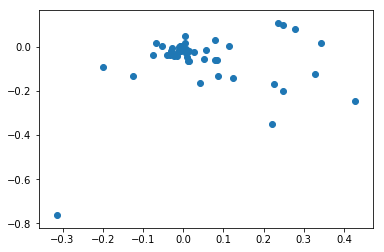

In [106]:
plt.scatter(own_pca_testdata.getEigenvectors()[:,0], own_pca_testdata.getEigenvectors()[:,1], cmap="rainbow")
plt.show()
#Loadings plot

In [114]:
class OwnPCANonStandard:
    def __init__(self, ip, n = None):
        self.ip = ip
        if n is not None:
            self.n = n
        else:
            self.n = ip.shape[1]

    def pca(self):
        #normalize matrix
        # self.normalize_ip = self.ip - self.ip.mean(axis=0) 
        #Step 1 - Find co-variance of the matrix
        self.covariance = np.cov(self.ip.T)
        #Step - 2 - Find eigenvalues and eigenvectors
        self.eigenvalues, self.eigenvectors = np.linalg.eig(self.covariance)
        #eigenvalues in descending order
        idx = self.eigenvalues.argsort()[::-1]   
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[:,idx]
        #Step - 3 - Take the first n principle components stated by user
        self.eigenvectors = self.eigenvectors[:,:self.n]
        #Step - 4 - Find scores by multiplying it with data
        scores = np.dot(self.ip, self.eigenvectors)
        return scores
    
    def getCovariance(self):
        return self.covariance
    
    def getEigenvalues(self):
        return self.eigenvalues
    
    def getEigenvectors(self):
        return self.eigenvectors
    
    def getAllValues(self):
        return self.covariance, self.eigenvalues, self.eigenvectors

In [115]:
own_pca_testdata_non_standard = OwnPCANonStandard(tdata)

In [116]:
scores_non_standard = own_pca_testdata_non_standard.pca()

In [117]:
scores_non_standard

array([[  2.67545772e+06    +0.j        ,  -3.60671440e+06    +0.j        ,
         -1.60847036e+06    +0.j        , ...,
          5.70794479e+02+18021.33451712j,   2.60623067e+04+14329.83185386j,
          2.60623067e+04-14329.83185386j],
       [  2.55452646e+06    +0.j        ,  -3.17447303e+06    +0.j        ,
         -8.26975757e+04    +0.j        , ...,
          5.70794479e+02+18021.33451712j,   2.60623067e+04+14329.83185386j,
          2.60623067e+04-14329.83185386j],
       [  2.70083724e+06    +0.j        ,  -3.22079630e+06    +0.j        ,
         -9.51415330e+04    +0.j        , ...,
          5.70794479e+02+18021.33451712j,   2.60623067e+04+14329.83185386j,
          2.60623067e+04-14329.83185386j],
       ..., 
       [  2.97755688e+05    +0.j        ,  -4.16052911e+06    +0.j        ,
         -2.29646255e+06    +0.j        , ...,
          5.70794479e+02+18021.33451712j,   2.60623067e+04+14329.83185386j,
          2.60623067e+04-14329.83185386j],
       [ -2.7491837

In [181]:
#answer is different
#The variance
np.sum(np.cov(own_pca_testdata_non_standard.getEigenvectors(), rowvar=False).diagonal())

(1.0002195214538729+0j)

In [180]:
#Variance of original data
np.sum(np.cov(own_pca_testdata.getEigenvectors(), rowvar=False).diagonal())

(1.0002195214538729+0j)

In [126]:
#Both match. Normalized and raw data pc variance are same

In [127]:
#Plot for PCA on raw data which will be the same.

C:\ProgramData\Miniconda3\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning:

Casting complex values to real discards the imaginary part



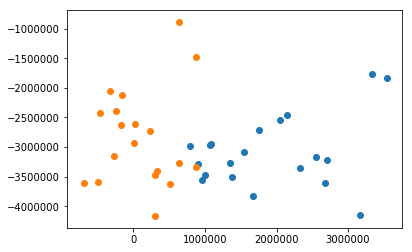

In [128]:
plt.scatter(scores_non_standard[:20,0], scores_non_standard[:20,1], cmap="rainbow")
plt.scatter(scores_non_standard[21:40,0], scores_non_standard[21:40,1])
plt.show()

In [129]:
#For un-normalized

In [131]:
np.cov(own_pca_testdata_non_standard.getEigenvectors()[:,0], 
       own_pca_testdata_non_standard.getEigenvectors()[:,1], rowvar=False)
#C0-variance between 2 PCA for non standard is also same - 0.00277

array([[ 0.01859618+0.j,  0.00277417+0.j],
       [ 0.00277417+0.j,  0.01739323+0.j]])

In [132]:
performance = [i/sum(own_pca_testdata_non_standard.getEigenvalues())*100 for i in own_pca_testdata_non_standard.getEigenvalues()]

In [133]:
performance

[(40.063899943904438+0j),
 (14.90897134057095+0j),
 (12.996709872406525+0j),
 (9.5348712301466989+0j),
 (6.4404292346208107+0j),
 (3.8147042357559919+0j),
 (2.8828684990928015+0j),
 (2.227699929068097+0j),
 (1.6360170455751757+0j),
 (1.2773307107164396+0j),
 (0.95174613997732804+0j),
 (0.63739437145014433+0j),
 (0.5725040317112523+0j),
 (0.49858974704220377+0j),
 (0.38392465956878996+0j),
 (0.24285880979910299+0j),
 (0.1965329456257269+0j),
 (0.16359056301569547+0j),
 (0.147599433149875+0j),
 (0.13251619459364827+0j),
 (0.071448631909356533+0j),
 (0.047784278396209245+0j),
 (0.039347113610501368+0j),
 (0.027788784263992342+0j),
 (0.022845018724659612+0j),
 (0.017865074672374644+0j),
 (0.015541965167145693+0j),
 (0.011386482189973889+0j),
 (0.0086014789989614163+0j),
 (0.0067056437851393683+0j),
 (0.0059287089617066861+0j),
 (0.0045253565664204205+0j),
 (0.0034271909916841082+0j),
 (0.0022025186833857465+0j),
 (0.001428928383934137+0j),
 (0.0010147308238427494+0j),
 (0.00084578814567382

In [134]:
#For un-normalized also, plot and performance is same and we need 4 PC for 75% data

C:\ProgramData\Miniconda3\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning:

Casting complex values to real discards the imaginary part



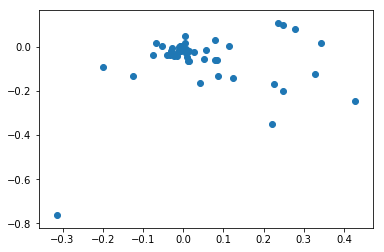

In [135]:
plt.scatter(own_pca_testdata_non_standard.getEigenvectors()[:,0], own_pca_testdata_non_standard.getEigenvectors()[:,1], cmap="rainbow")
plt.show()

In [136]:
#Above is loadings plot for un-normalized data

In [137]:
#Thank you